In [26]:
import sys
import subprocess
import cdsapi
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

import errno
from dask.diagnostics import ProgressBar
import scipy
import netCDF4
from dask.distributed import progress

In [28]:
from dask.distributed import Client

client = Client('tcp://127.0.0.1:50528')
client

#from dask.distributed import Client

#client = Client(n_workers=56, threads_per_worker=1, memory_limit='4GB')

#client

Client Scheduler: tcp://127.0.0.1:50528 Dashboard: http://127.0.0.1:38549/status,Cluster Workers: 56 Cores: 56 Memory: 224.00 GB


In [7]:
#client.loop.add_callback(client.scheduler.retire_workers, close_workers=True)
#client.loop.add_callback(client.scheduler.terminate)
#client.run_on_scheduler(lambda dask_scheduler: dask_scheduler.loop.stop())

In [8]:
#client.run_on_scheduler(lambda dask_scheduler=None: 
#    dask_scheduler.close() & sys.exit(0))

In [29]:
mychunk = {'latitude':25,'longitude':25,'time': -1}
def RunRHExtremes(zone):
    zone = "SAR"
    basedir = '/mnt/DataDrive2/data/mjolly/era5-land'
    #basedir = '/mnt/nas/jolly'
    yrs = range(2015,2021)
    for y in yrs:
        print("Summarizing RH for year:",y)
        ifile = '%s/era5-land-%s-2m_rh-%s-*nc' % (basedir,zone,y)
        print("Outfile: %s:" % (ifile))
        zone_rh = xr.open_mfdataset(ifile,chunks=mychunk,parallel=True,engine='netcdf4')
        outds = zone_rh.resample(time='D').min('time')
        ifile = '%s/era5-land-%s-2m_rhmin-%s.nc' % (basedir,zone,y)
        outds.to_netcdf(ifile,format= 'NETCDF4' )
        outds = zone_rh.resample(time='D').max('time')
        ifile = '%s/era5-land-%s-2m_rhmax-%s.nc' % (basedir,zone,y)
        outds.to_netcdf(ifile,format= 'NETCDF4' )

%time RunRHExtremes("SAR")

Summarizing RH for year: 2015
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_rh-2015-*nc:


distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


Summarizing RH for year: 2016
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_rh-2016-*nc:


distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Summarizing RH for year: 2017
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_rh-2017-*nc:


distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Summarizing RH for year: 2018
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_rh-2018-*nc:


distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Summarizing RH for year: 2019
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_rh-2019-*nc:


distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Summarizing RH for year: 2020
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_rh-2020-*nc:


distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

CPU times: user 8min 45s, sys: 32.3 s, total: 9min 18s
Wall time: 3h 3min 53s


In [30]:
mychunk = {'latitude':25,'longitude':25,'time': -1}
def RunTempExtremes(zone):
    #zone = "SAR"
    basedir = '/mnt/DataDrive2/data/mjolly/era5-land'
    #basedir = '/mnt/nas/jolly'
    yrs = range(2015,2021)
    for y in yrs:
        print("Summarizing Temperatures for year:",y)
        ifile = '%s/era5-land-%s-2m_temperature-%s-*nc' % (basedir,zone,y)
        print("Outfile: %s:" % (ifile))
        zone_temp= xr.open_mfdataset(ifile,chunks=mychunk,parallel=True,engine='netcdf4')
        outds = zone_temp.resample(time='D').min('time')
        ifile = '%s/era5-land-%s-2m_tmin-%s.nc' % (basedir,zone,y)
        outds.to_netcdf(ifile,format= 'NETCDF4' )
        outds = zone_temp.resample(time='D').max('time')
        ifile = '%s/era5-land-%s-2m_tmax-%s.nc' % (basedir,zone,y)
        outds.to_netcdf(ifile,format= 'NETCDF4' )

%time RunTempExtremes("SAR")

Summarizing Temperatures for year: 2015
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_temperature-2015-*nc:


distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Summarizing Temperatures for year: 2016
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_temperature-2016-*nc:


distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Summarizing Temperatures for year: 2017
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_temperature-2017-*nc:


distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Summarizing Temperatures for year: 2018
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_temperature-2018-*nc:


distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Summarizing Temperatures for year: 2019
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_temperature-2019-*nc:


distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Summarizing Temperatures for year: 2020
Outfile: /mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_temperature-2020-*nc:


distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

CPU times: user 8min 47s, sys: 31.5 s, total: 9min 18s
Wall time: 3h 38min 10s


In [ ]:
# Fix the hourly precip and solar radiation

def special_mean(x, drop_min=False):
    return np.diff(x,prepend=0)

def special_func(data):
    return xr.apply_ufunc(special_mean, data, input_core_dims=[["time"]],
                          output_core_dims=[["time"]],
            kwargs={'drop_min': True}, dask = 'allowed', vectorize = True)

# Fix the time so that the 24 hour accumulations work correctly
zone_prcp.time.where(zone_prcp.time.dt.hour == 0)
temp = zone_prcp.time
tempsave = temp
temp = xr.where((temp.dt.hour == 0), temp - np.timedelta64(1,'s'), temp)
#zone_prcp['time'] = temp
print(temp)

In [33]:
mychunk = {'latitude':25,'longitude':25,'time': -1}
zone = "SAR"
basedir = '/mnt/DataDrive2/data/mjolly/era5-land'
#basedir = '/mnt/nas/jolly'
y = 2017
ifile = '/mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_rhmin-*.nc'

zone_rhmin = xr.open_mfdataset(ifile,chunks=mychunk,parallel=True,engine='netcdf4')



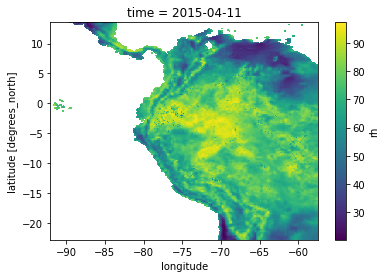

In [34]:
zone_rhmin.rh[100].plot()

In [35]:
t = zone_rhmin.sel(latitude=-11.58257164274016,longitude=-70.61278378627453,method='nearest')

Text(0.5, 0, 'Time')

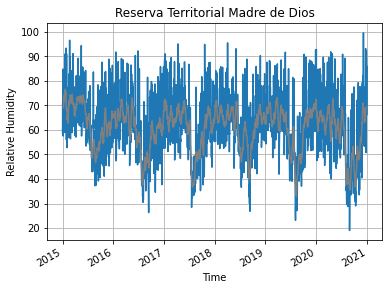

In [47]:
t.rh.plot()
t.rh.rolling(time=15 ,center=True).mean().plot(color='grey')
plt.grid()
plt.gca().set_ylabel("Relative Humidity")
plt.title("Reserva Territorial Madre de Dios")
plt.gca().set_xlabel("Time")

In [23]:
mychunk = {'latitude':25,'longitude':25}
zone = "SAR"
basedir = '/mnt/DataDrive2/data/mjolly/era5-land'


ifile = '%s/era5-land-%s-daily_prcp-2015.nc' % (basedir,zone)

zone_prcp = xr.open_mfdataset(ifile,chunks=mychunk,parallel=True,engine='netcdf4')

In [25]:
zone_prcp

,Array,Chunk
Bytes,15.62 MB,77.50 kB
Shape,"(31, 364, 346)","(31, 25, 25)"
Count,211 Tasks,210 Chunks
Type,float32,numpy.ndarray


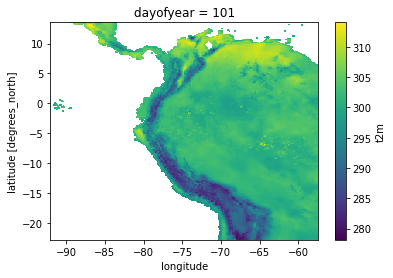

In [14]:
zone_tmax.t2m[100].plot()

In [ ]:
ofzarr = '/mnt/DataDrive2/data/mjolly/era5-land/era5-land-SAR-2m_tmax.zarr'
zone_tmax.to_zarr(ofzarr)

In [ ]:


data = zone_srad_pt
data['time'] = temp
new = data.ssrd.resample(time='D').apply(special_func) / 3600
new[0] = 0
#new[1:48].plot()
zone_full_pt['ssrd'] = new

data = zone_prcp_pt
data['time'] = temp
new = data.tp.resample(time='D').apply(special_func)  * 100
new[0] = 0
new.plot()
zone_full_pt['tp'] = new


In [5]:
zone_prcp.tp


,Array,Chunk
Bytes,374.81 MB,1.86 MB
Shape,"(744, 364, 346)","(744, 25, 25)"
Count,211 Tasks,210 Chunks
Type,float32,numpy.ndarray


In [ ]:
temp_sl = zone_prcp.isel(latitude=slice(300,304),longitude=slice(300,304))
newtp = temp_sl.tp.resample(time='D').apply(special_func)  * 100

In [ ]:
temp_sl.tp[100].plot()
temp_sl.time

In [22]:
import math
class KBDI:
    yKBDI = 100
    KBDI = 100
    fAvgPrecip = 15
    CummPrecip = 0
    
    def __init__(self,fAvgPrecipIn):
        self.fAvgPrecip = fAvgPrecipIn
        
    def Calc (self,fPrecipAmt, iMaxTemp):
            net = 0
            idq = 0
            pptnet = 0.00
            xkbdi = 0.00
            xtemp = 0.00

            KBDI = int(self.yKBDI)
            if(fPrecipAmt == 0.0):
                self.CummPrecip = 0
            else:
                if(self.CummPrecip > 0.20):
                    pptnet = fPrecipAmt
                    self.CummPrecip = self.CummPrecip + fPrecipAmt
                else:
                    self.CummPrecip = self.CummPrecip + fPrecipAmt
                    if(self.CummPrecip > 0.20):
                        pptnet = self.CummPrecip - 0.20

            net = (100.0 * pptnet) + 0.0005

            net = KBDI - net

            if net > 0:
                KBDI = round(net,0)
            else:
                KBDI = 0
            if(iMaxTemp > 50):
                idq = (800.0 - KBDI) * (0.9679 * math.exp(0.0486 * iMaxTemp) - 8.299) * 0.001 / (1.0 + 10.88 * math.exp(-0.04409 * self.fAvgPrecip)) + 0.5
            self.KBDI = int(KBDI + idq)
            self.yKBDI = self.KBDI
            return self.KBDI


In [23]:
KBDICalc = KBDI(25)

In [32]:
x = []
y = []

for i in range(0,180):
    x.append(i)
    y.append(KBDICalc.Calc(0,75))

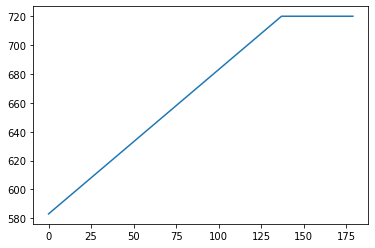

In [33]:
plt.plot(x,y)


In [69]:
from math import *
#el= [6.5, 7.5, 9.0, 12.8, 13.9, 13.9, 12.4, 10.9, 9.4, 8.0, 7.0, 6.0 ]
#fl = [-1.6, -1.6, -1.6, 0.9, 3.8, 5.8, 6.4, 5.0, 2.4, 0.4, -1.6, -1.6 ]

# Correction for southern hemisphere
#https://cfs.nrcan.gc.ca/pubwarehouse/pdfs/29152.pdf


class CFFDRS:
    old_ffmc = 85
    old_dmc = 6
    old_dc = 15
    ffmc = 0
    dmc = 0
    dc = 0
    isi = 0
    bui = 0
    fwi = 0
    dsr = 0
    el = [10.1,9.6,9.1,8.5,8.1,7.8,7.9,8.3,8.9,9.4,9.9,10.2]
    fl = [6.4,5.0,2.4,0.4,-1.6,-1.6,-1.6,-1.6,-1.6,0.9,3.8,5.8]
    def __init__(self, startffmc,startdmc,startdc):
        self.old_ffmc = startffmc
        self.old_dmc = startdmc
        self.old_dc = startdc

    def Calc(self,dayOfYear, month, year, _temp, rh, _ws,_rain):
        SI= True
        temp = (_temp - 32) * 5 / 9  # Convert temp to C
        ws = _ws * 1.609 # Convert MPH to KPH
        rain = _rain * 25.40  # Convert inches to mm
        
        if(SI):
            temp = _temp
            ws = _ws
            rain = _rain
        #start with ffmc
        wmo = 147.2 * (101 - self.old_ffmc) / (59.5 + self.old_ffmc)
        if(rain > 0.5):
            ra = rain - 0.5
            if(ra < 0.1):
                ra = 0.1
            if(wmo > 150.0):
                wmo = wmo + 42.5 * ra * exp(-100.0 / (251 - wmo)) * (1.0 - exp(-6.93 / ra)) + 0.0015 * (wmo - 150) * (wmo - 150) * sqrt(ra)
            else:
                wmo = wmo + 42.5 * ra * exp(-100.0 / (251 - wmo)) * (1.0 - exp(-6.93 / ra))

        if(wmo > 250):
            wmo = 250
        ed = 0.942 * pow(rh, 0.679) + 11.0 * exp((rh - 100.0) / 10.0)+ 0.18 * (21.1 - temp) * (1.0 - exp(rh * -0.115))

        ew = 0.618 * pow(rh, 0.753) + 10.0 * exp((rh - 100.0) / 10.0) + 0.18 * (21.1 - temp) * (1.0 - exp(rh * -0.115))
        print(ed,ew,wmo)
        if(wmo < ed and wmo < ew):
            z = 0.424 * (1.0 - pow(((100.0 - rh) / 100.0), 1.7)) + 0.0694 * sqrt(ws) * (1.0 - pow((100.0 - rh) / 100.0, 8.0))
            x = z * 0.581 * exp(0.0365 * temp)
            wm = ew - (ew - wmo) * pow(10.0, -x)
        elif(wmo > ed):
            z = 0.424 * (1.0 - pow(rh / 100.0, 1.7)) + 0.0694 * sqrt(ws) * (1.0 - pow(rh / 100.0, 8.0))
            x = z * 0.581 * exp(0.0365 * temp)
            wm = ed + (wmo - ed) * pow(10.0, -x)
        else:
            wm = wmo
        if(wm < 0.0):
            wm = 0.0
        ffmc = 59.5 * (250.0 - wm) / (147.2 + wm)
        if(ffmc > 101.0):
            ffmc = 101.0
        if(ffmc < 0):
            ffmc = 0
        #now the DMC part
        t = temp
        if(temp < -1.1):
            t = -1.1
        rk = 1.894 * (t + 1.1) * (100.0 - rh) * self.el[month - 1] * 0.0001
        if(rain <= 1.5):
            pr = self.old_dmc
        else:
            ra = rain
            rw = 0.92 * ra - 1.27
            wmi = 20.0 + 280.0 / exp(0.023 * old_dmc)
            if(old_dmc <= 33):
                b = 100.0 / (0.5 + 0.3 * old_dmc)
            elif(old_dmc <= 65):
                b = 14.0 - 1.3 * log(old_dmc)
            else:
                b = 6.2 * log(old_dmc) - 17.2
            wmr = wmi + 1000.0 * rw / (48.77 + b * rw)
            pr = 43.43 * (5.6348 - log(wmr - 20.0))

        if(pr < 0.0):
            pr = 0.0
        dmc = pr + rk
        if(dmc < 0.0):
            dmc = 0.0
        #calculate DC
        if(temp < -2.8):
            t = -2.8

        if(rain <= 2.801):
            dr = self.old_dc
        else:
            ra = rain
            rw = 0.83 * ra - 1.27
            smi = 800 * exp(-old_dc / 400.0)
            qr = smi + 3.937 * rw
            dr = 400 * log(800 / qr)
            if(dr < 0):
                dr = 0

        v = 0.36 * (t + 2.8) + self.fl[month - 1]
        if(v < 0):
            v = 0
        dc = dr + v * 0.5
        if (dc < 0.0):
            dc = 0.0
        #calc isi and the rest...
        sf = 91.9 * exp(-0.1386 * wm) * (1.0 + pow(wm, 5.31) / 4.93e07)
        isi = 0.208 * sf * exp(0.05039 * ws)

        if(dmc == 0.0 and dc == 0.0):
            bui = 0.0
        elif(dmc <= 0.4 * dc):
            bui = 0.8 * dmc * dc / (dmc + 0.4 * dc)
        else:
            bui = dmc - (1 - 0.8 * dc / (dmc + 0.4 * dc)) * (0.92 + pow(0.0114 * dmc, 1.7))
        if(bui < 0.0):
            bui = 0.0
        if(bui <= 80):
            fd = 0.626 * pow(bui, 0.809) + 2
        else:
            fd = 1000 / (25 + 108.64 * exp(-0.023 * bui))
        B = 0.1 * isi * fd
        if(B > 1):
            fwi = exp(2.72 * pow(0.434 * log(B), 0.647))
        else:
            fwi = B
        dsr = 0.0272 * pow(fwi, 1.77)
        self.old_ffmc = ffmc
        self.old_dc = dc
        self.old_dmc = dmc
        return fwi
    

In [70]:
CFFDRSCalc = CFFDRS(85,6,15)

In [71]:
CFFDRSCalc.Calc(180,6,2020,25,20,10,0)



6.574024581840384 5.269183541344221 16.29896193771626


10.244119544610454

In [61]:
class CFFDRSNew():
   
    
    def __init__(self, startffmc,startdmc,startdc):
        self.old_ffmc = startffmc
        self.old_dmc = startdmc
        self.old_dc = startdc
        self.el = [10.1,9.6,9.1,8.5,8.1,7.8,7.9,8.3,8.9,9.4,9.9,10.2]
        self.fl = [6.4,5.0,2.4,0.4,-1.6,-1.6,-1.6,-1.6,-1.6,0.9,3.8,5.8]
        
    def CalcFWI(self,dayOfYear, month, year, _temp, rh, _ws,_rain):
        return 5

In [65]:
CFFDRSCalc = CFFDRSNew(85,6,15)
CFFDRSCalc.CalcFWI(180,6,2020,25,20,10,0)


5

In [64]:
class CFFDRS():
      
    # init method or constructor
    def __init__(self, startffmc,startdmc,startdc):
        self.model = startffmc
        self.color = startdmc
          
    def show(self):
        print("Model is", self.model )
        print("color is", self.color )
          
# both objects have different self which 
# contain their attributes
audi = CFFDRS("audi a4", "blue","")
ferrari = CFFDRS("ferrari 488", "green")
  
audi.show()     # same output as car.show(audi)
ferrari.show()  # same output as car.show(ferrari)
  
# Behind the scene, in every instance method 
# call, python sends the instances also with
# that method call like car.show(audi)

TypeError: __init__() missing 1 required positional argument: 'startdc'